## Univariate

Number of Records = 58
First Year: 1960
Last Year: 2017


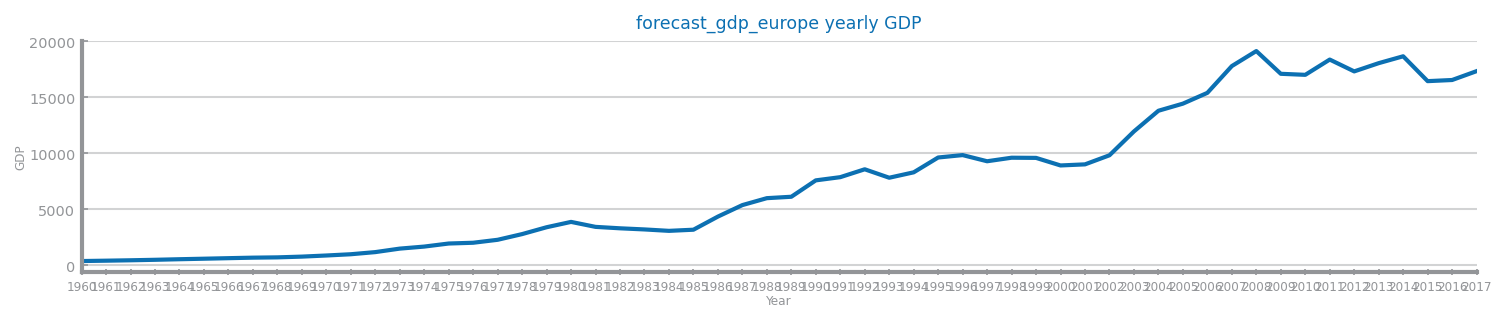

In [7]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "forecast_gdp_europe"
target = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv",
    sep=",",  # Comma-separated values
    decimal=".",  # Use period for decimal
    parse_dates=["Year"],  # Parse the Year column as datetime
    infer_datetime_format=True,
)

# Set the Year column as the index
data.set_index("Year", inplace=True)

# Extract the target series (GDP)
series: Series = data[target]

# Print profiling information
print("Number of Records =", series.shape[0])
print("First Year:", series.index[0].year)
print("Last Year:", series.index[-1].year)

# Plot the univariate time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.year.to_list(),  # Extract years for the x-axis
    series.to_list(),  # Values of the GDP
    xlabel="Year",  # Label the x-axis correctly
    ylabel=target,
    title=f"{file_tag} yearly {target}",  # Change title to reflect yearly data
)
show()


## Multivariate

Number of Records = (58, 11)
First Year: 1960
Last Year: 2017


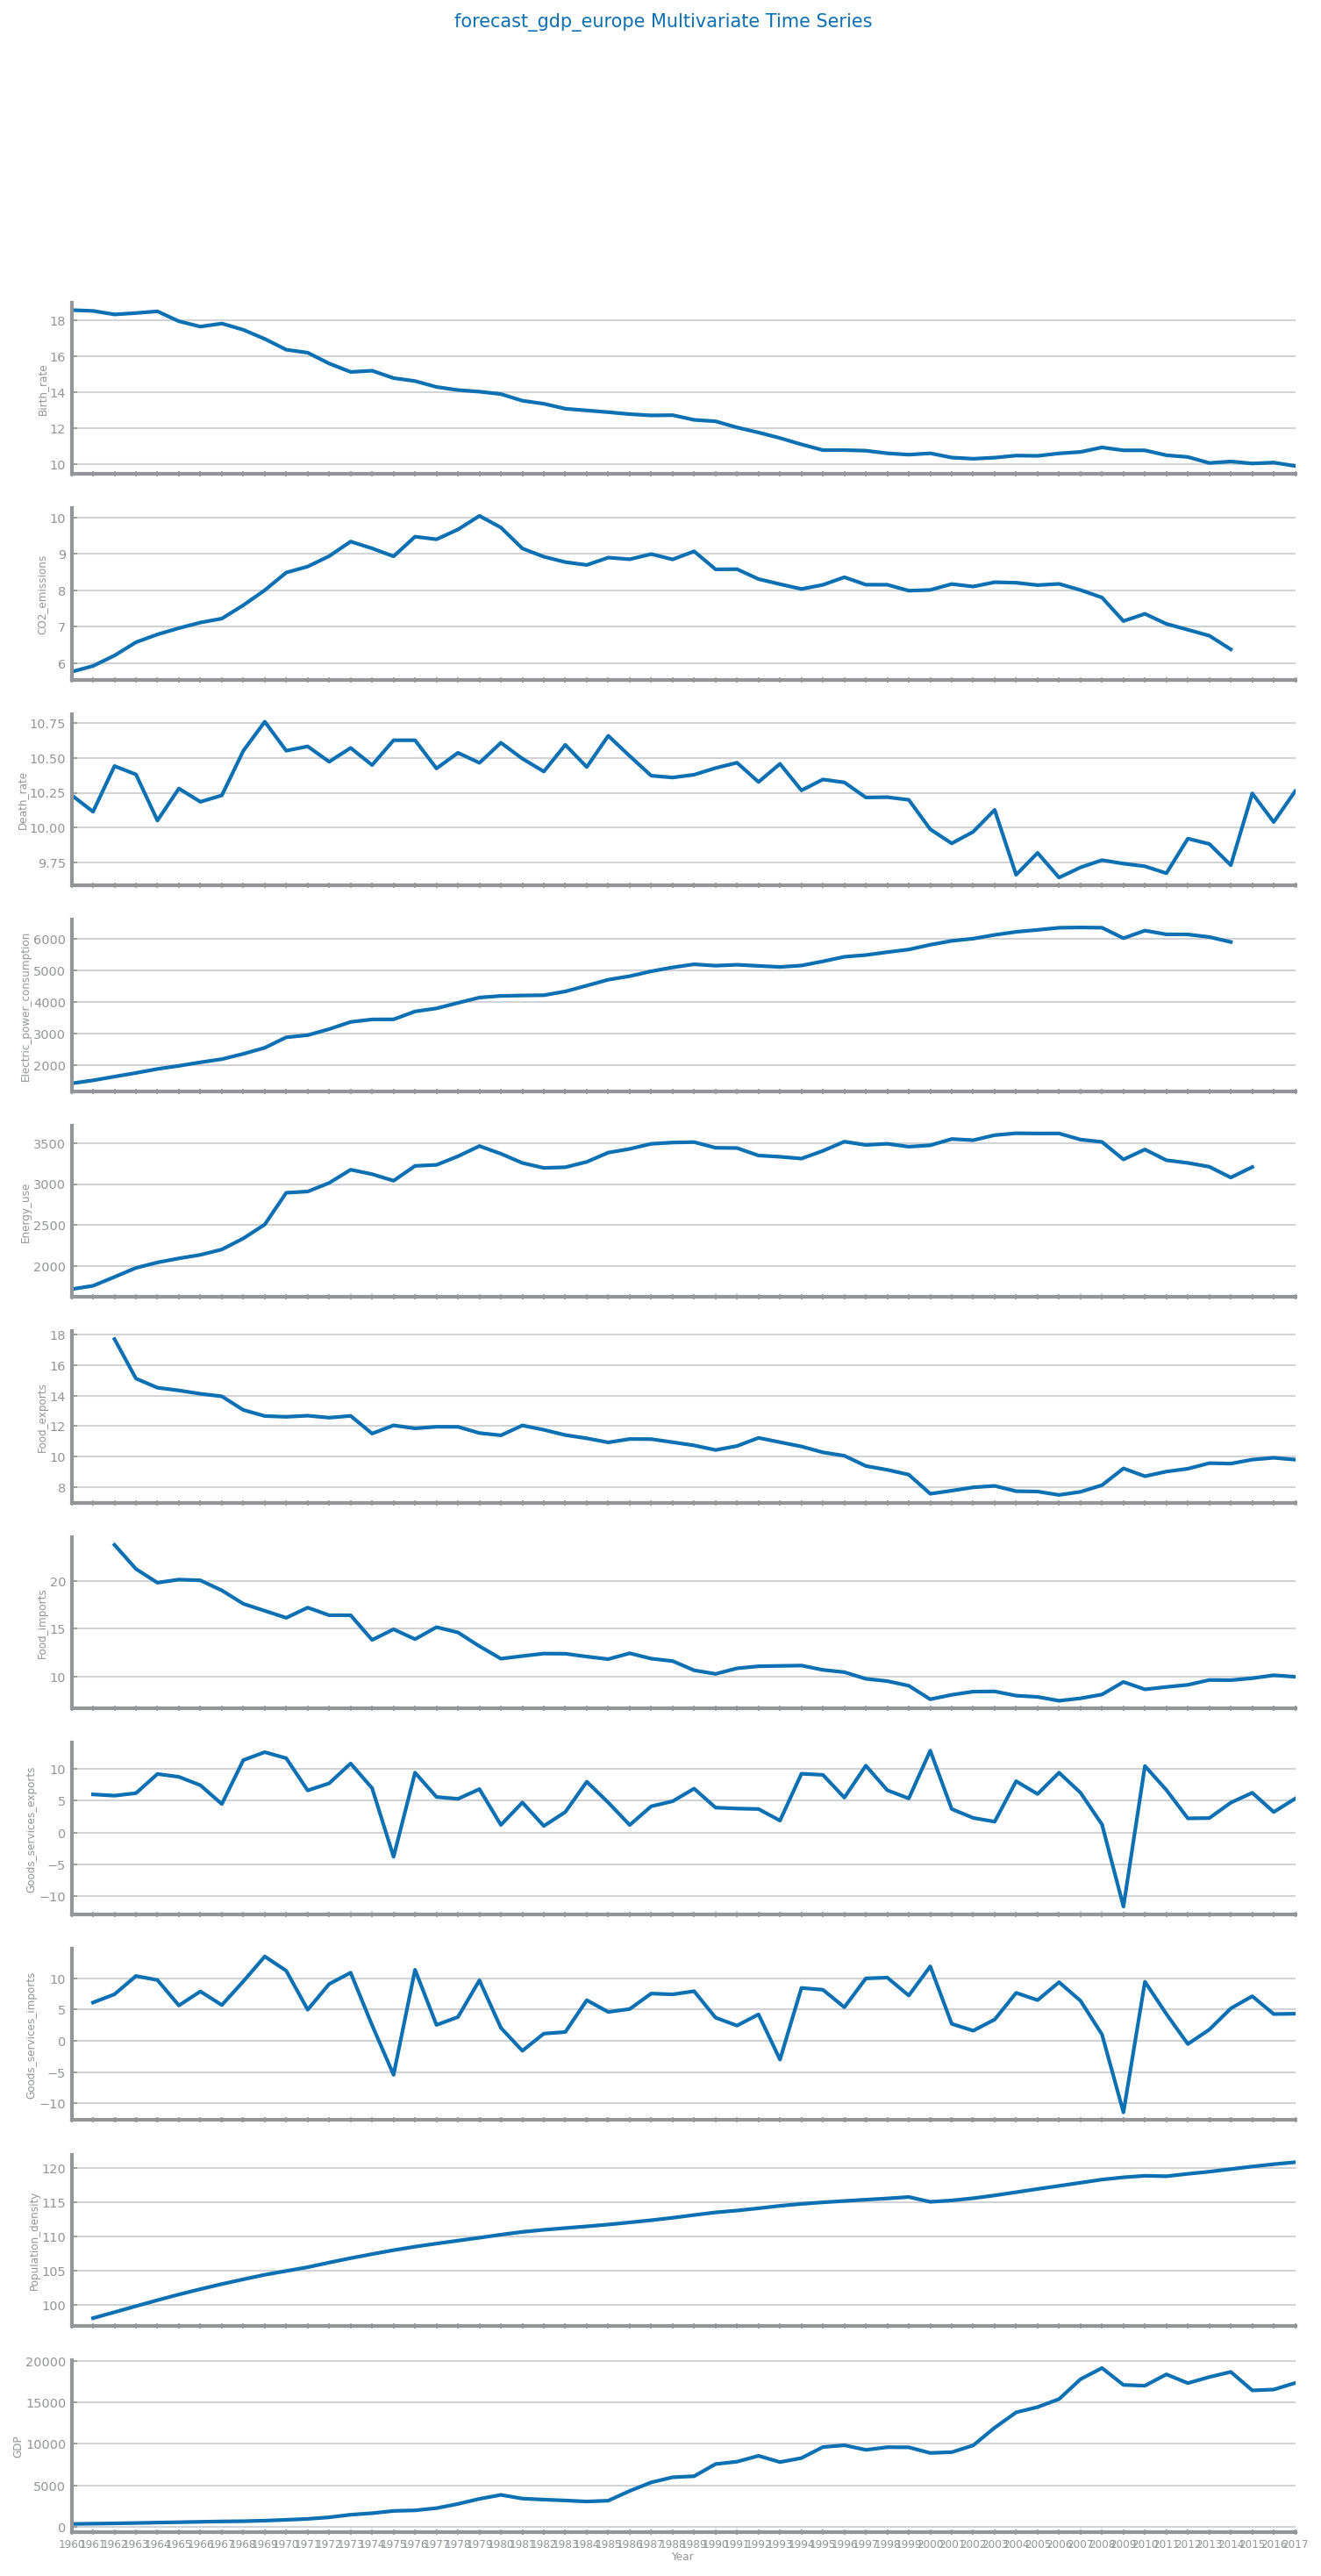

In [8]:
from pandas import read_csv, DataFrame
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, show
from matplotlib.figure import Figure
from dslabs_functions import plot_line_chart, HEIGHT

# Define the multivariate plot function
def plot_ts_multivariate_chart(data: DataFrame, title: str) -> list[Axes]:
    """
    Plot multiple time series in a single figure with subplots.
    Each time series is plotted in its own subplot.
    """
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(
        data.shape[1], 1, figsize=(3 * HEIGHT, HEIGHT / 2 * data.shape[1]), sharex=True
    )
    fig.suptitle(title)

    for i, col in enumerate(data.columns):
        ax = axs[i] if data.shape[1] > 1 else axs  # Handle single-column case
        plot_line_chart(
            data.index.year.to_list(),  # Convert DatetimeIndex to year
            data[col].to_list(),
            ax=ax,
            xlabel="Year" if i == data.shape[1] - 1 else "",  # Only label the last x-axis
            ylabel=col,
        )
    return axs

# File details
file_tag = "forecast_gdp_europe"

# Load the dataset
data: DataFrame = read_csv(
    "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv",
    sep=",",  # Comma-separated values
    decimal=".",  # Use period for decimal
    parse_dates=["Year"],  # Parse the Year column
    infer_datetime_format=True,
)

# Set the Year column as the index
data.set_index("Year", inplace=True)

# Print profiling information
print("Number of Records =", data.shape)
print("First Year:", data.index[0].year)
print("Last Year:", data.index[-1].year)

# Plot the multivariate time series
plot_ts_multivariate_chart(data, title=f"{file_tag} Multivariate Time Series")
show()
